# Batch Normalization(배치 정규화)

* 데이터가 정규분포를 따른다고 가정하고 데이터의 평균을 0으로, 분산을 1로 만들고 약간의 노이즈를 더함.


* 학습이 빨라지고 local optimum에 빠지는 가능성을 낮춰줌


* 학습의 불안정화의 원인을 레이어마다 입력의 분산이 달라지는 Internal Covariance Shift(공변량 변화)로 가정하고 분산을 맞춰줌으로서 이를 해결함
  
  ※ [최근 논문](https://arxiv.org/pdf/1805.11604.pdf)에서는 배치 정규화의 성능 증가가 입력 분포의 안정성과는 상관이 없고, 최적화 환경을 더 smooth하게 만듦으로써 안정적인 Gradient를 유발해 빠른 Training을 가능하게 한다고 주장함
  
  
* [배치 재정규화](https://arxiv.org/pdf/1702.03275.pdf) 등 기존의 배치 정규화보다 나은 성능을 보이는 기법이 발표됨


* 일반적으로 합성곱, 전결합층 다음에 사용

In [30]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import tensorflow.keras
from tensorflow.keras import activations


(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')/255.
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')/255.

y_train = tensorflow.keras.utils.to_categorical(y_train, 100)
y_test = tensorflow.keras.utils.to_categorical(y_test, 100)

In [32]:
# 모델1 : 배치 정규화가 없는 모델

model1 = Sequential()

model1.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3), activation=activations.relu))
model1.add(Conv2D(16, (3, 3), padding="same", activation=activations.relu))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding="same", activation=activations.relu))
model1.add(Conv2D(32, (3, 3), padding="same", activation=activations.relu))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding="same", activation=activations.relu))
model1.add(Conv2D(64, (3, 3), padding="same", activation=activations.relu))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512, activation=activations.relu))
model1.add(Dense(100, activation=activations.softmax))

model1.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 4.4125 - accuracy: 0.0308WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001FFAB53DAF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [34]:
# 모델2 : 배치 정규화가 있는 모델

model2 = Sequential()

model2.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3), activation=activations.relu))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), padding="same", activation=activations.relu))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation=activations.relu))
model2.add(BatchNormalization())
model2.add(Dense(100, activation=activations.softmax))

model2.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
193/196 [============================>.] - ETA: 0s - loss: 3.8734 - accuracy: 0.1448WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002022862CF78> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

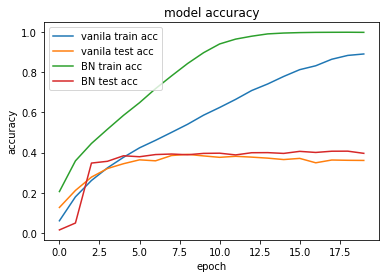

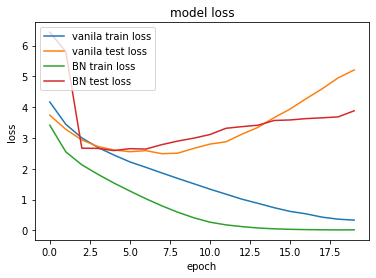

In [35]:
import matplotlib.pyplot as plt


plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['vanila train acc', 'vanila test acc', 'BN train acc', 'BN test acc'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['vanila train loss', 'vanila test loss', 'BN train loss', 'BN test loss'], loc='upper left')
plt.show()